### Import required packages

In [1]:
# import required packages
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation and analysis
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for enhanced data visualization
import warnings  # to suppress unnecessary warnings

# Suppress warnings to enhance code readability
warnings.filterwarnings("ignore")

### Load the Dataset

In [2]:
# reads 'car.data' as a pandas dataframe
df = pd.read_csv("../data/car.data", header=None)

# displays the top 5 rows of the dataframe
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# rename the columns of the dataFrame for better readability
df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "classes"]

# displays the top 5 rows of the dataframe
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Handling Missing Values

In [4]:
# counting null values in each column of the dataframe
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
classes     0
dtype: int64

### Summary Statistics

In [5]:
# gives summary stats for each field in the dataframe
df.describe().T

,count,unique,top,freq
buying,1728,4,vhigh,432
maint,1728,4,vhigh,432
doors,1728,4,2,432
persons,1728,3,2,576
lug_boot,1728,3,small,576
safety,1728,3,low,576
classes,1728,4,unacc,1210


### Data Visualization

In [6]:
def categorical_viz(df: pd.DataFrame, column_name: str):
    """
    Visualize a categorical column in a DataFrame using countplot and a pie chart.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to visualize.

    Returns:
        None
    """

    # create a figure with two subplots (one for countplot and one for the pie chart)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # plot a countplot for the categorical column
    sns.countplot(data=df, x=column_name, ax=axes[0], palette="bright")

    # plot a pie chart to show the distribution of categories
    df[column_name].value_counts().plot.pie(autopct="%1.1f%%", ax=axes[1])

    # adjust the layout of the plots for better visualization
    plt.tight_layout()

    # display the visualizations
    plt.show()


# get the list of column names from the DataFrame
columns = df.columns

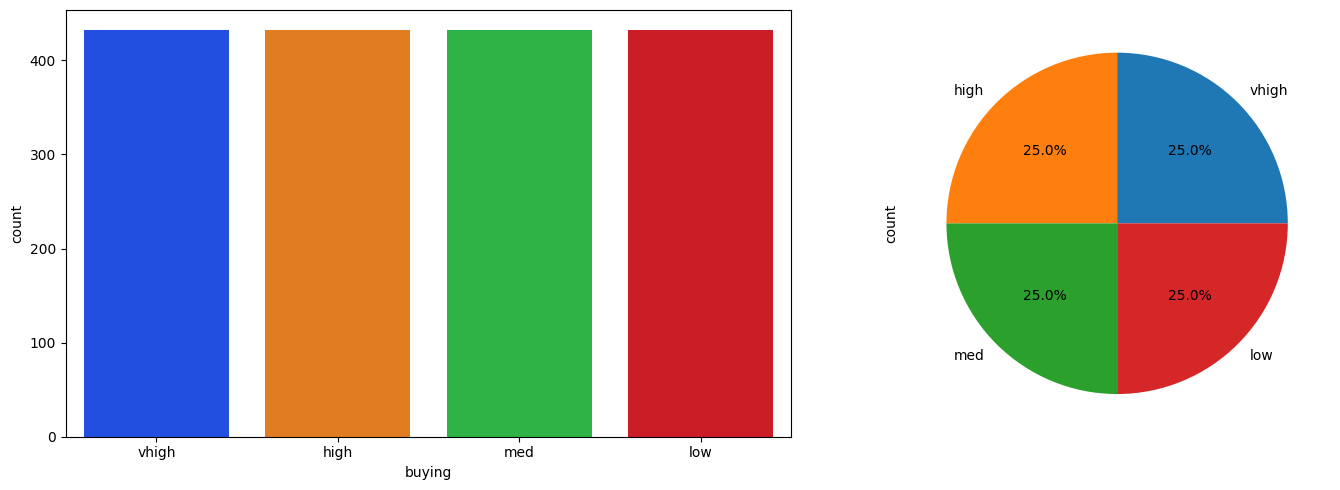

In [7]:
categorical_viz(df, columns[0])

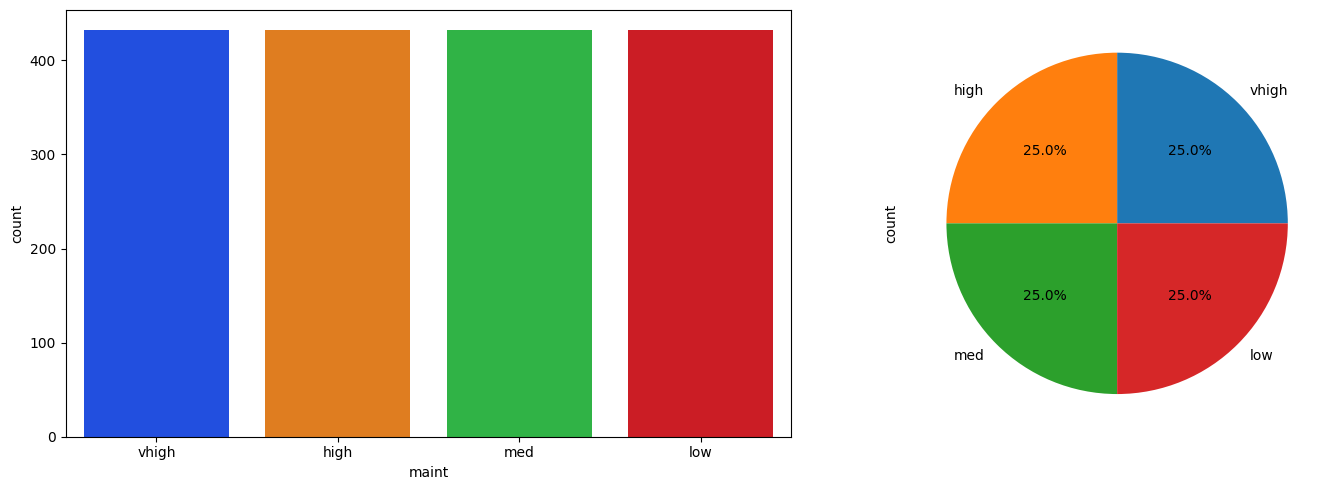

In [8]:
categorical_viz(df, columns[1])

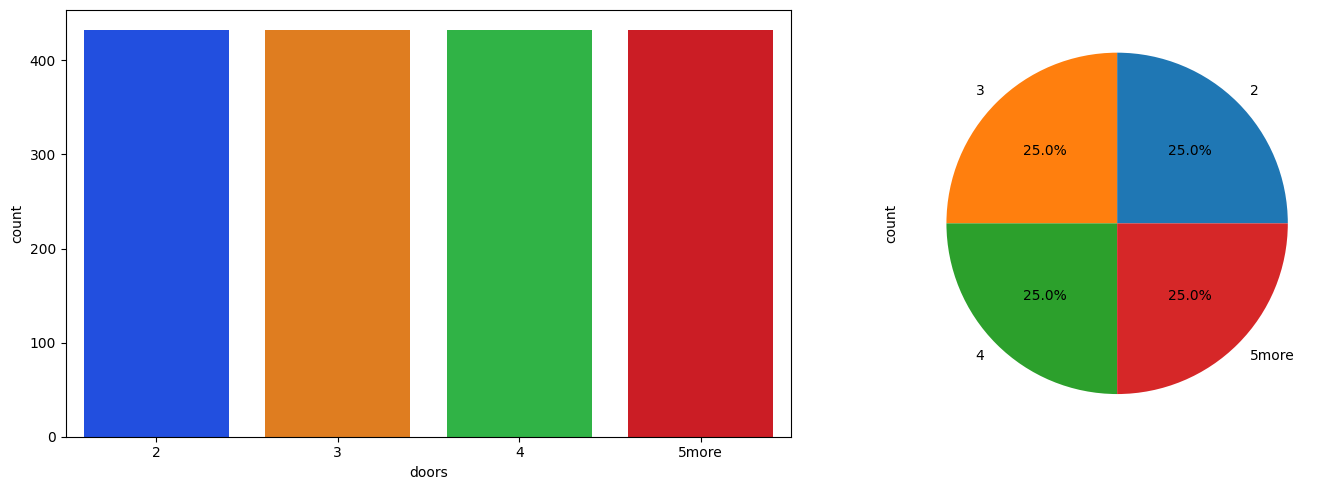

In [9]:
categorical_viz(df, columns[2])

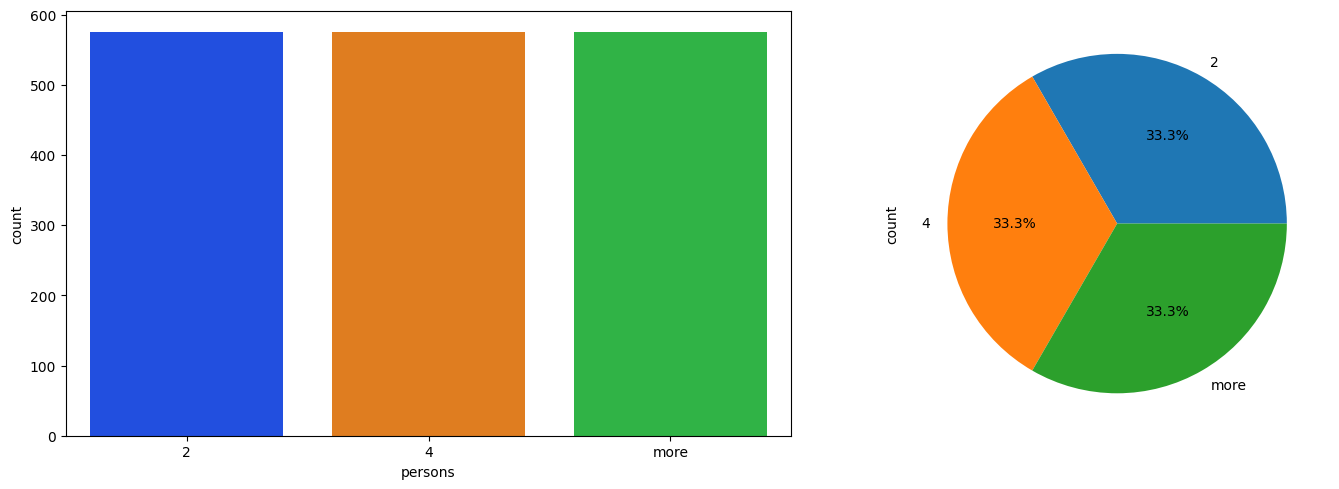

In [10]:
categorical_viz(df, columns[3])

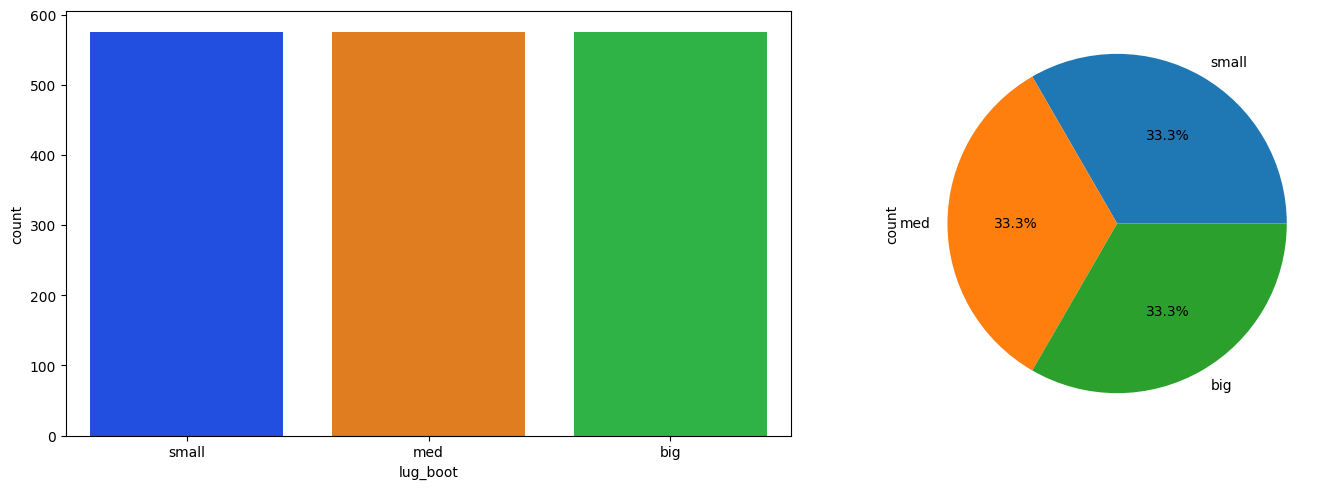

In [11]:
categorical_viz(df, columns[4])

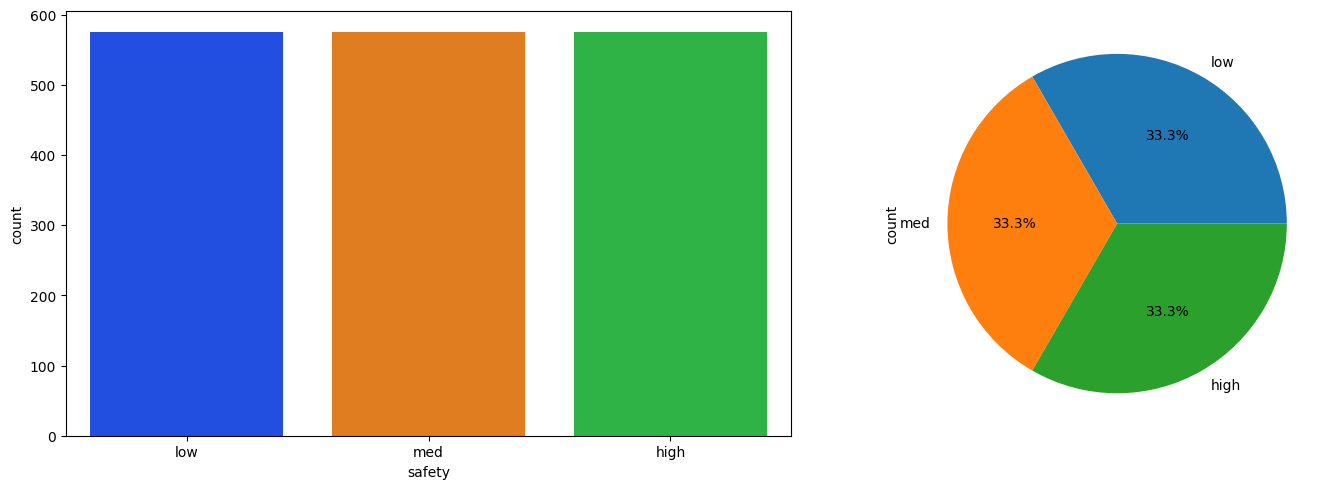

In [12]:
categorical_viz(df, columns[5])

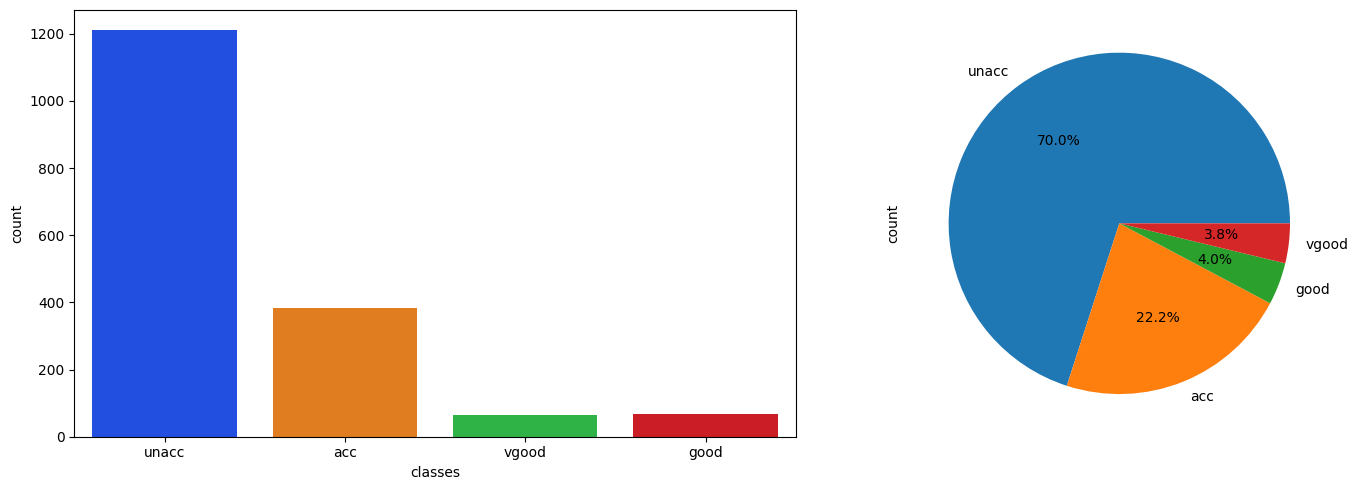

In [13]:
categorical_viz(df, columns[6])

### Data Encoding

In [14]:
# replace categorical values with numeric values
df["buying"].replace({"vhigh": 1, "high": 2, "med": 3, "low": 4}, inplace=True)
df["maint"].replace({"vhigh": 1, "high": 2, "med": 3, "low": 4}, inplace=True)
df["doors"].replace({"2": 1, "3": 2, "4": 3, "5more": 4}, inplace=True)
df["persons"].replace({"2": 1, "4": 2, "more": 3}, inplace=True)
df["lug_boot"].replace({"small": 1, "med": 2, "big": 3}, inplace=True)
df["safety"].replace({"low": 1, "med": 2, "high": 3}, inplace=True)
df["classes"].replace({"unacc": 1, "acc": 2, "good": 3, "vgood": 4}, inplace=True)

# displays the top 5 rows of the dataframe
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


### Data Splitting

In [15]:
X = df.drop(["classes"], axis=1)  # X contains all independant variables
y = df["classes"]  # Y contains only the dependant variable

In [16]:
X[:5]

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2


In [17]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: classes, dtype: int64

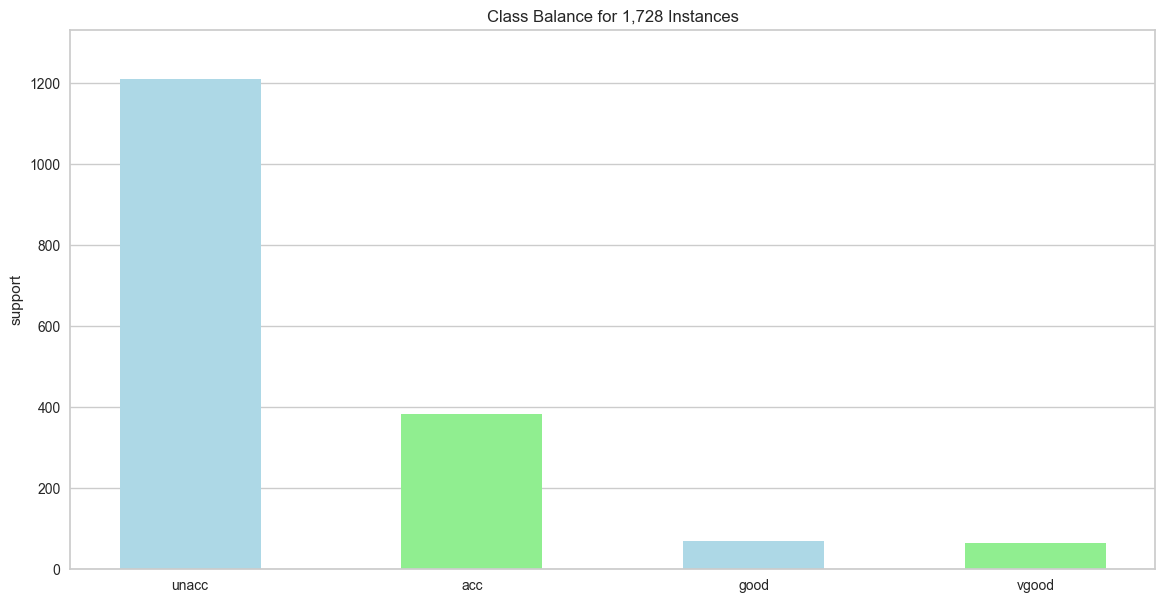

In [18]:
from yellowbrick.target import ClassBalance

classes = ["unacc", "acc", "good", "vgood"]
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

#### Sampling Imbalanced Data

In [19]:
# Class balance between dependant variable is imbalanced
from imblearn import combine

smt = combine.SMOTETomek(
    random_state=14
)  # To make the dependant variable balanced using SMOTETomek method
X, y = smt.fit_resample(X, y)  # resampling the dataset

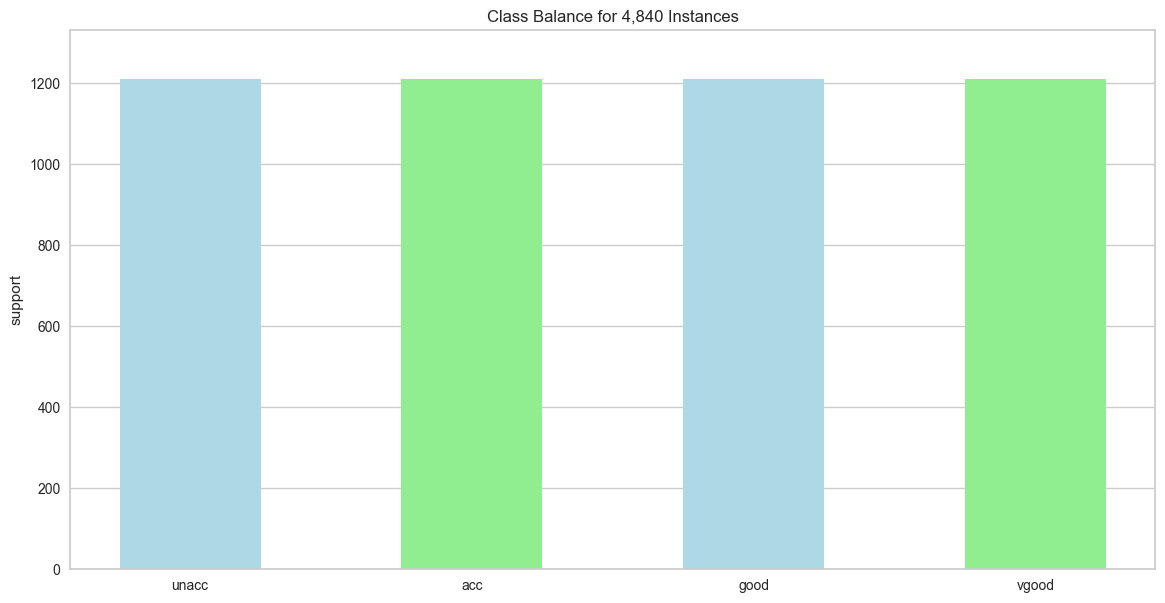

In [20]:
# Class balance between dependant variable is much more balanced now..
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

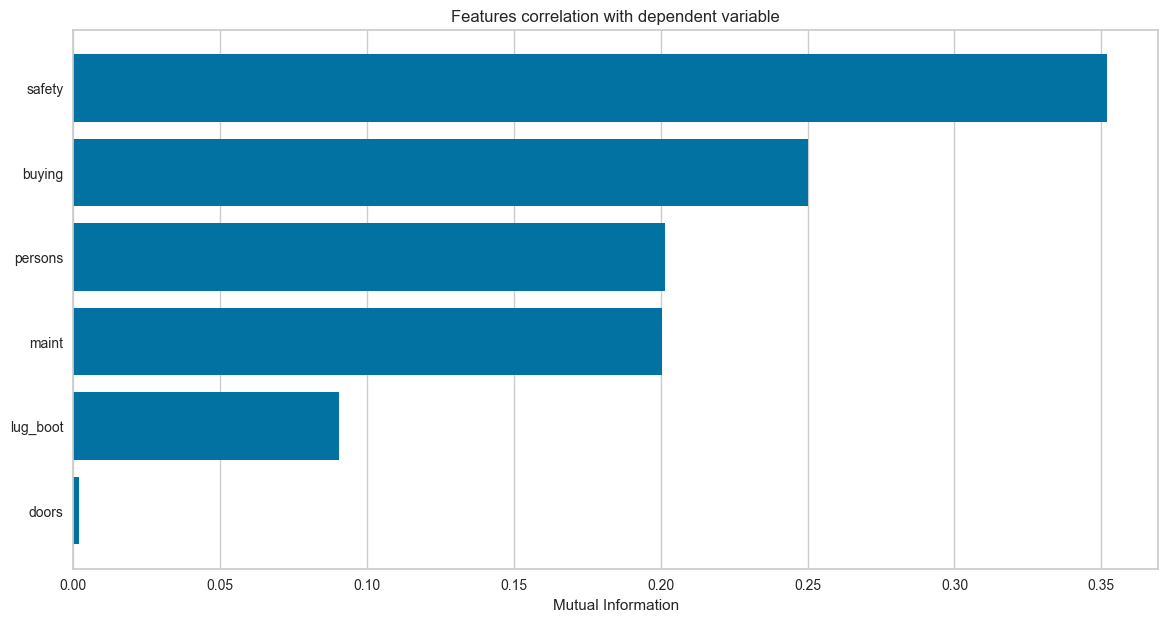

In [21]:
from yellowbrick.target import FeatureCorrelation

plt.figure(figsize=(14, 7))
visualizer = FeatureCorrelation(method="mutual_info-classification", sort=True)
visualizer.fit(X, y)
visualizer.show()
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

# splitting X and Y as train & test sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

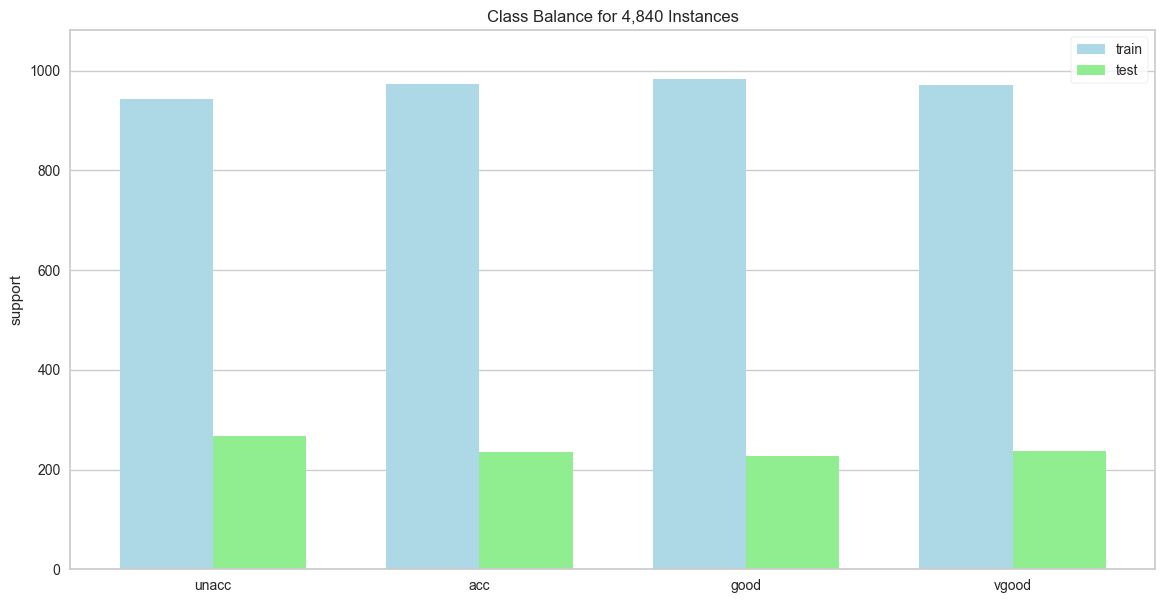

In [23]:
plt.figure(figsize=(14, 7))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y_train, y_test)
viz.show()
plt.show()

### Model Building

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
)

In [25]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=7, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

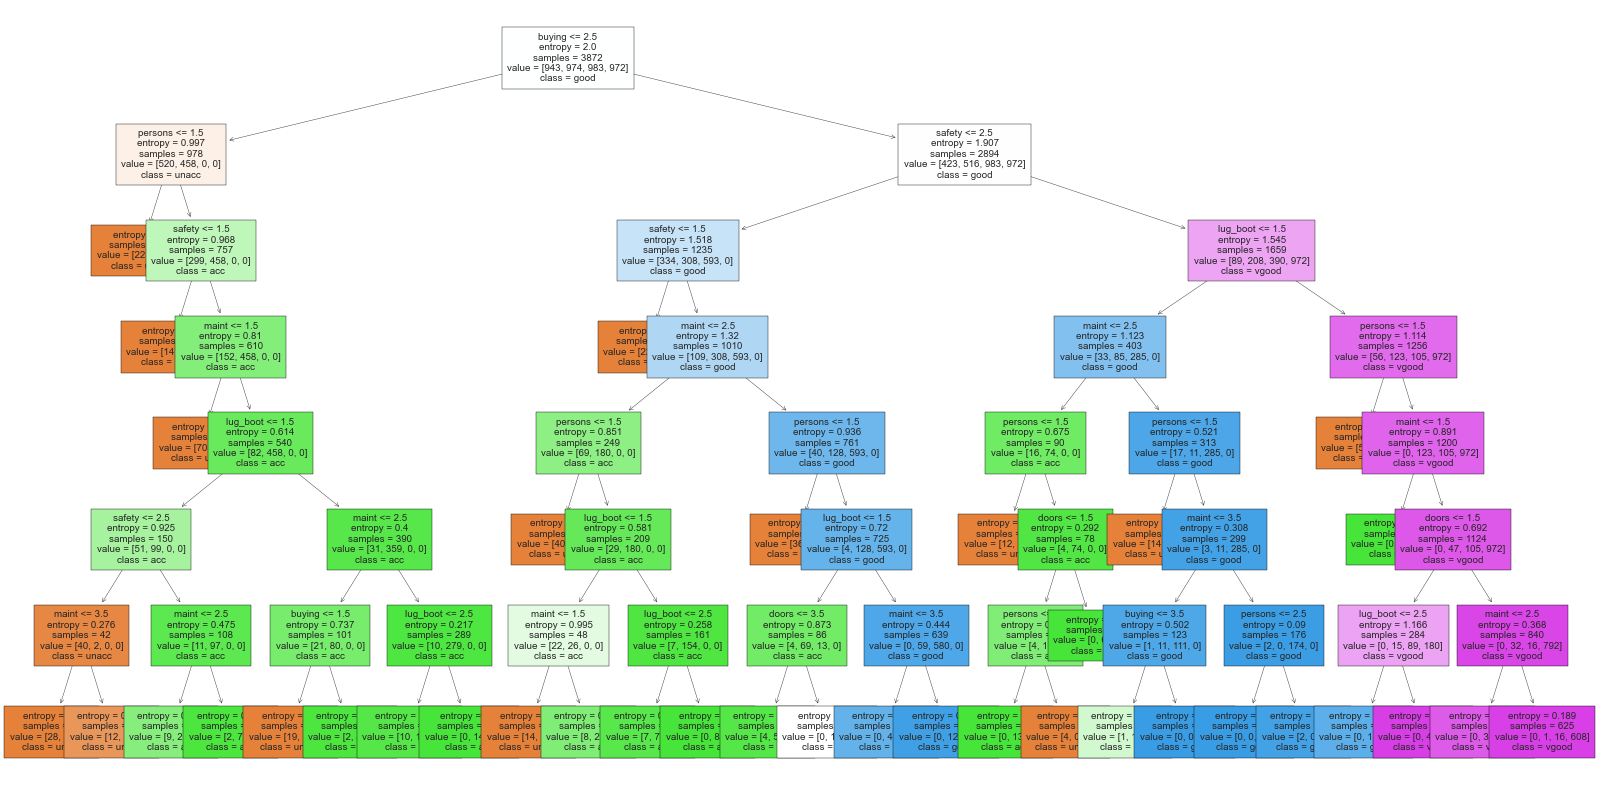

In [26]:
plt.figure(figsize=(20, 10))
plot_tree(model, fontsize=7, filled=True, feature_names=df.columns, class_names=classes)
plt.show()

In [27]:
y_pred = model.predict(X_test)

**Classification Accuracy:**

In [28]:
print(accuracy_score(y_test, y_pred))

0.9483471074380165


**Classification Error:**

In [29]:
print(1 - accuracy_score(y_test, y_pred))

0.051652892561983466


**Class Prediction Error**

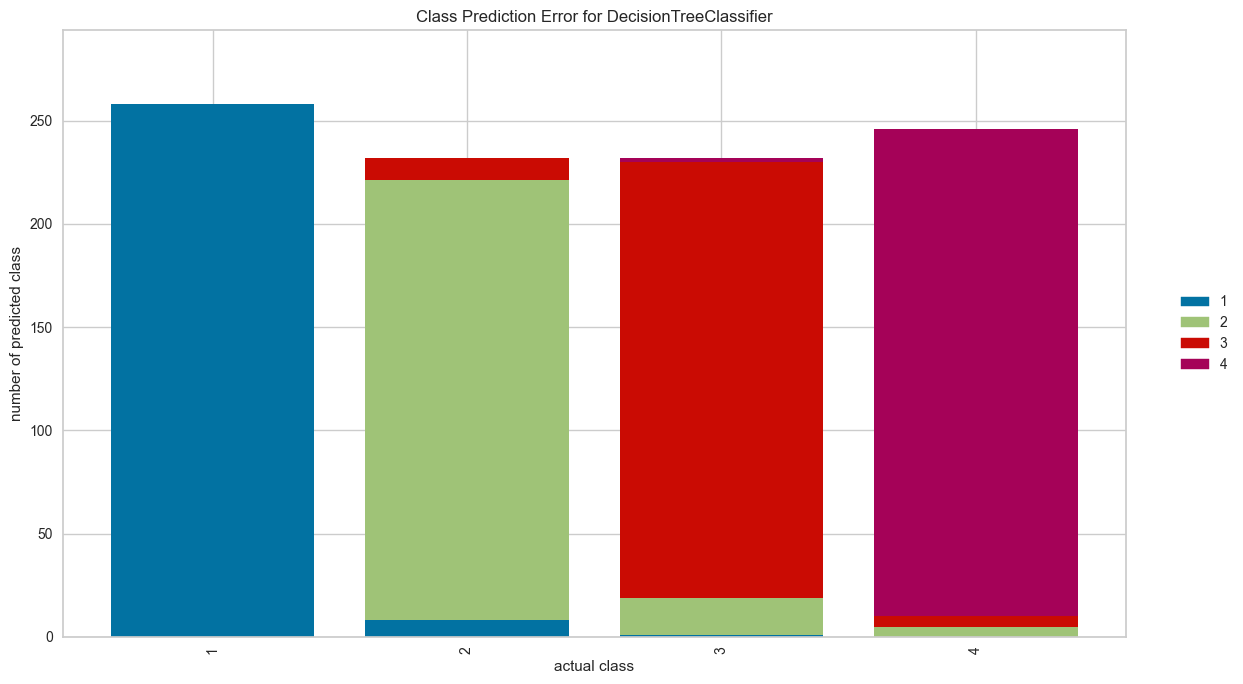

In [30]:
from yellowbrick.classifier import class_prediction_error

plt.figure(figsize=(14, 7))
visualizer = class_prediction_error(model, X_train, y_train, X_test, y_test)
visualizer.show()
plt.show()

**Confusion Matrix**

In [31]:
confusion_matrix(y_test, y_pred)

array([[258,   8,   1,   0],
       [  0, 213,  18,   5],
       [  0,  11, 211,   5],
       [  0,   0,   2, 236]], dtype=int64)

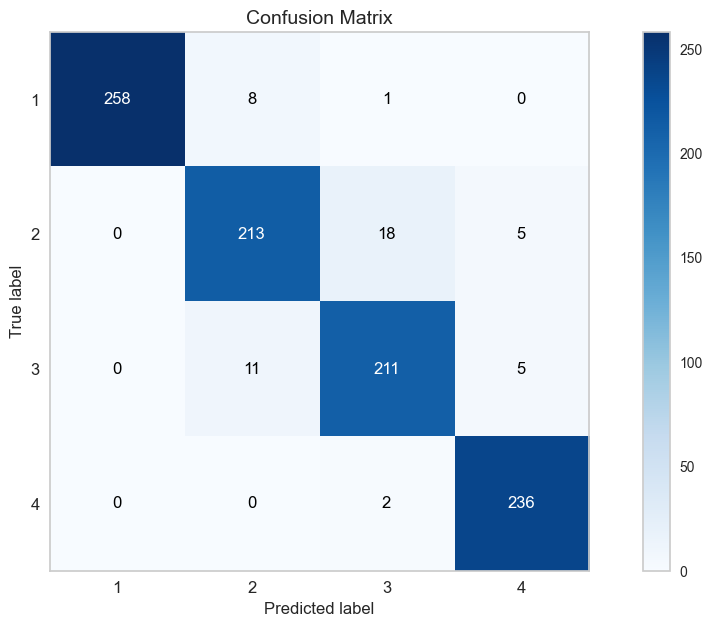

In [32]:
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(
    y_test, y_pred, figsize=(14, 7), title_fontsize=14, text_fontsize=12
)
plt.show()

**Classification Report**

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98       267
           2       0.92      0.90      0.91       236
           3       0.91      0.93      0.92       227
           4       0.96      0.99      0.98       238

    accuracy                           0.95       968
   macro avg       0.95      0.95      0.95       968
weighted avg       0.95      0.95      0.95       968



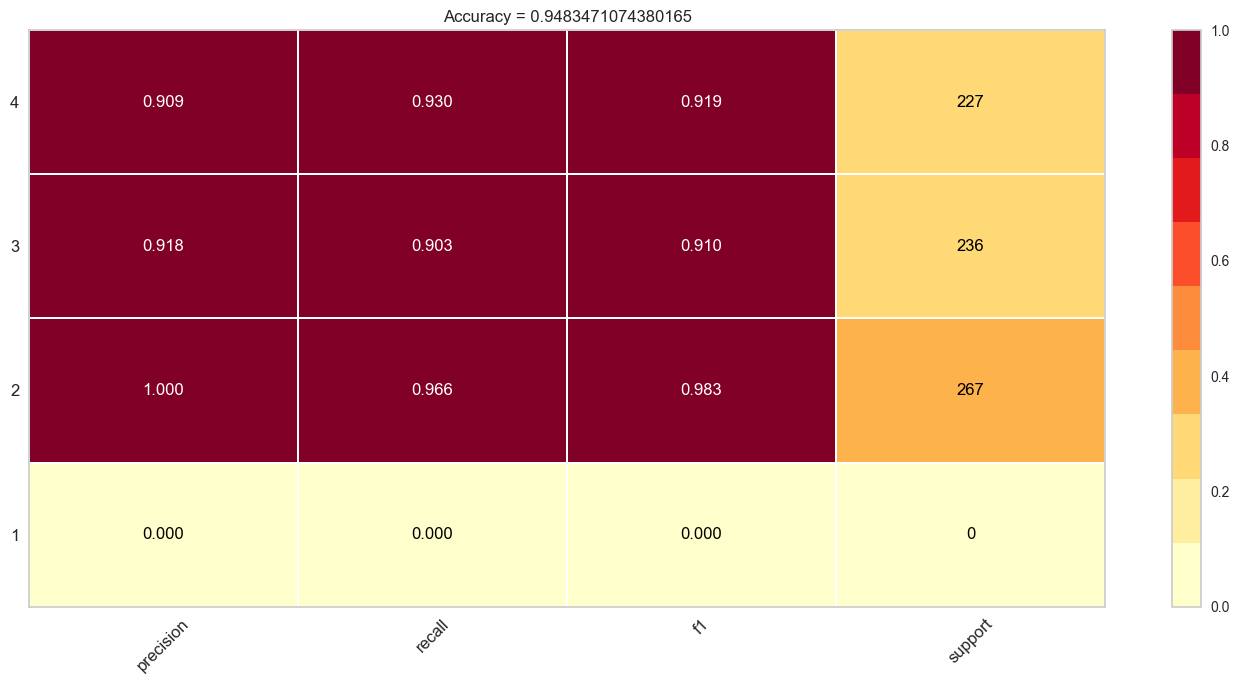

In [35]:
from yellowbrick.classifier import classification_report

plt.figure(figsize=(14, 7))
visualizer = classification_report(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    support=True,
    title=f"Accuracy = {accuracy_score(y_test, y_pred)}",
)
plt.show()